#Machine Learning CSCI-B455 FINAL PROJECT

By Katie Yoder & Serena Patel

The goal of our final project was to answer the question, “Does the timing of the stay at home order affect the infection cases?” By utilizing the New York Times Coronavirus database, we were able to visually understand the data and predict a correlation, then to create a machine learning model for a linear regression model and an MLP Regression model. 

#Data Exploration

Visualizing the data allowed us to see how the raw data looks, and how it looks in correlation to our question. In particular, we looked at the state level and county level data for the cases and deaths for each area. We access the NYT github and automatically pulled the latest data. 

In [2]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from datetime import date


statedf = None
countydf = None
stateupdated = False
countyupdated = False
processed = False
today = date.today()
    

print("Today is:", today)
    
state_url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
s=requests.get(state_url).content
statedf = pd.read_csv(io.StringIO(s.decode('utf-8')))
statedf['date'] =  pd.to_datetime(statedf['date'], format='%Y-%m-%d')
stateupdated = True
    

county_url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
s=requests.get(county_url).content
countydf = pd.read_csv(io.StringIO(s.decode('utf-8')))
countydf['date'] =  pd.to_datetime(countydf['date'], format='%Y-%m-%d')
countyupdated = True

    

if stateupdated:
    print("First 5 rows of the state data")
    print("="*50)
    print(statedf.head())
if countyupdated:
    print()
    print("First 5 rows of the county data")
    print("="*50)
    print(countydf.head())
    

pd.set_option('mode.chained_assignment', None)
statedict = {}
countydict = {}
print("Processing...")


if stateupdated:
  statelist = list(statedf['state'].unique())
  for s in statelist:
    state_df=statedf[statedf['state']==s]
    state_df['newcases'] = state_df['cases'].diff()
    state_df['newdeaths'] = state_df['deaths'].diff()
    statedict[s]=state_df

if countyupdated:
  countylist = list(countydf['county'].unique())
  for c in countylist:
    county_df=countydf[countydf['county']==c]
    county_df['newcases'] = county_df['cases'].diff()
    county_df['newdeaths'] = county_df['deaths'].diff()
    countydict[c]=county_df
processed = True
print("Finshed processing")
    


        
    

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Today is: 2020-05-05
First 5 rows of the state data
        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0

First 5 rows of the county data
        date     county       state     fips  cases  deaths
0 2020-01-21  Snohomish  Washington  53061.0      1       0
1 2020-01-22  Snohomish  Washington  53061.0      1       0
2 2020-01-23  Snohomish  Washington  53061.0      1       0
3 2020-01-24       Cook    Illinois  17031.0      1       0
4 2020-01-24  Snohomish  Washington  53061.0      1       0
Processing...
Finshed processing


#State-wide cumulative cases and deaths

Here, we just pulled the data for the state as a whole, and visualized the data to see how the cumulative cases and deaths grew. 

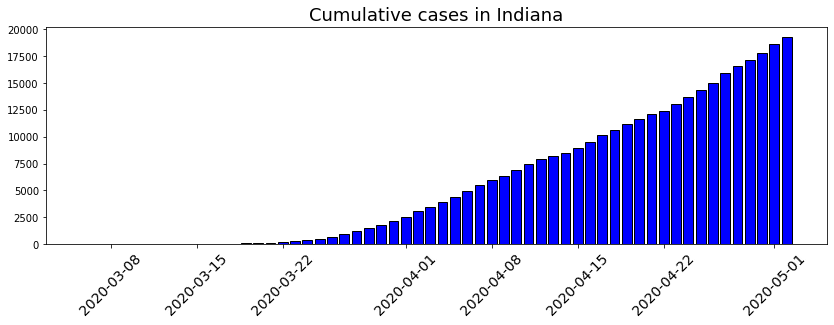

In [0]:
state = 'Indiana'      
s = str(state)
df = statedict[s]
        
dates = df['date']
cases = df['cases']
deaths = df['deaths']
newcases = df['newcases']
newdeaths = df['newdeaths']
        

        
plt.figure(figsize=(14,4))
plt.title("Cumulative cases in {}".format(s),fontsize=18)
plt.bar(x=dates,height=cases,color='blue',edgecolor='k')
plt.xticks(rotation=45,fontsize=14)
plt.show()


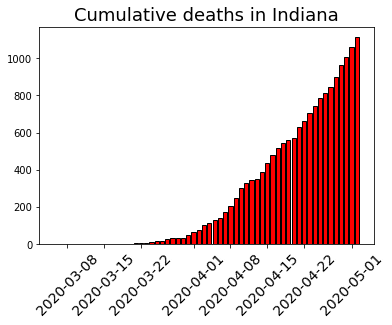

In [0]:
plt.title("Cumulative deaths in Indiana".format(s),fontsize=18)
plt.bar(x=dates,height=deaths,color='red',edgecolor='k')
plt.xticks(rotation=45,fontsize=14)
plt.show()

#Comparison Chart of Cumulative Number of Cases & Number of Deaths Over Time In Indiana

This chart gives us a more comparable way to see the data. Above, we see how the cases and deaths grew individually in the state of Indiana. Here see the difference in growth between the two variables. While cases grow almost exponentially, the death rate is increasing gradually. 

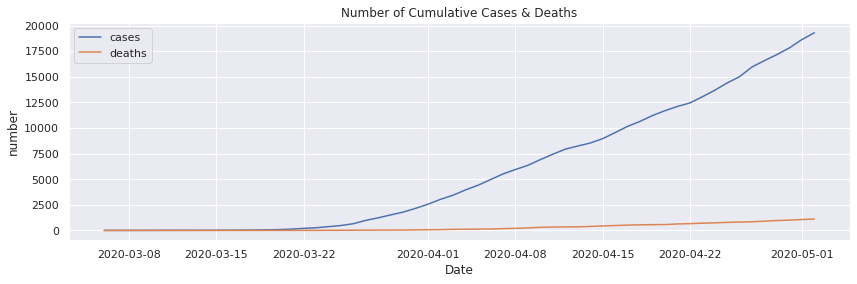

In [0]:
state = 'Indiana'      
s = str(state)
df = statedict[s]
        
dates = df['date']
cases = df['cases']
deaths = df['deaths']

plt.figure(figsize=(14,4))
plt.plot(dates, cases, label='cases')
plt.plot(dates, deaths, label='deaths')
plt.xlabel('Date')
plt.ylabel('number')
plt.title('Number of Cumulative Cases & Deaths')
plt.grid(True)
plt.legend()

#County-based cumulative cases and deaths

Here, we see a similar visualization of the data as the state-level data but we do it for the county-level data. We see that the shape for the data was similar, so that we can say that the county and state data are consistent, which shows that the county data contributes strongly to the state data.

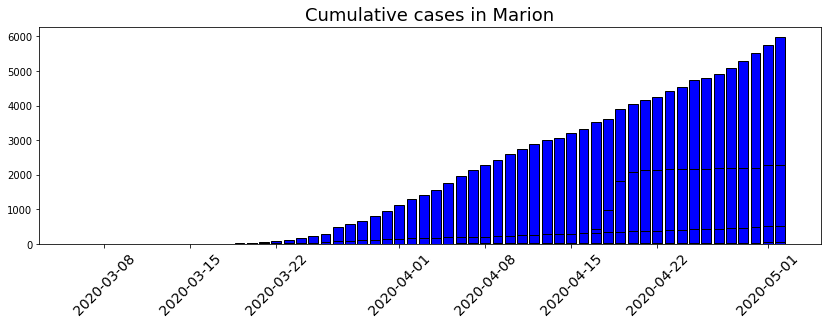

In [0]:
county = 'Marion'      
s = str(county)
df = countydict[s]
        
dates = df['date']
cases = df['cases']
deaths = df['deaths']
 
plt.figure(figsize=(14,4))
plt.title("Cumulative cases in {}".format(s),fontsize=18)
plt.bar(x=dates,height=cases,color='blue',edgecolor='k')
plt.xticks(rotation=45,fontsize=14)
plt.show()

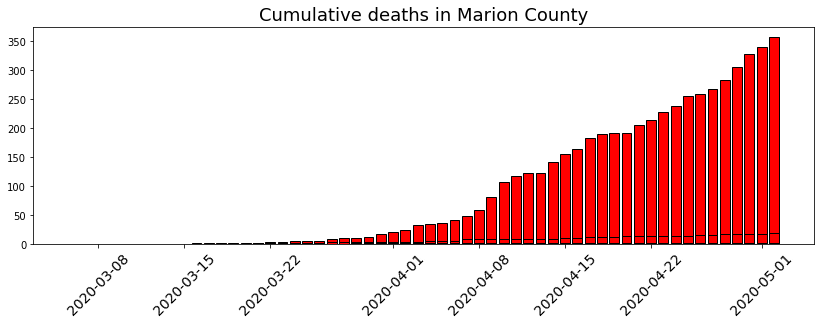

In [0]:
plt.figure(figsize=(14,4))
plt.title("Cumulative deaths in Marion County".format(s),fontsize=18)
plt.bar(x=dates,height=deaths,color='red',edgecolor='k')
plt.xticks(rotation=45,fontsize=14)
plt.show()

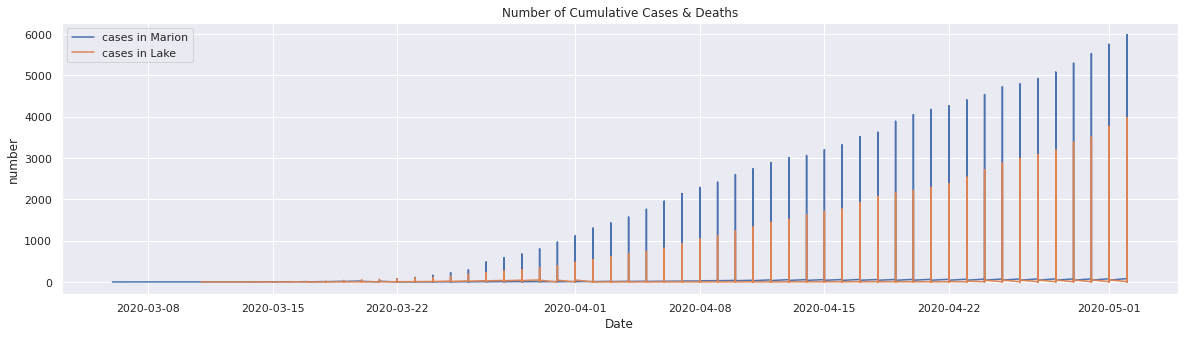

In [0]:
county = 'Marion'      
s = str(county)
df1 = countydict[s]
        
dates = df1['date']
cases = df1['cases']
deaths = df1['deaths']

county = 'Lake'      
s = str(county)
df2 = countydict[s]
        
dates2 = df2['date']
cases2 = df2['cases']
deaths2 = df2['deaths']

plt.figure(figsize=(20,5))

plt.plot(dates, cases, label='cases in Marion')

plt.plot(dates2, cases2, label='cases in Lake')


plt.xlabel('Date')
plt.ylabel('number')
plt.title('Number of Cumulative Cases & Deaths')
plt.grid(True)
plt.legend()


#Data Analysis Conclusion

From the above visualization, we were able to see how the data looks. We can examine that the state and county level data have similar shapes in the death rate and the cases. Since there clear exponential growth in the county and the state, the county contributes to the state data. We can make additional conclusions about the shape of the data for the states by comparing the shape of the data for the different states with the Indiana data.

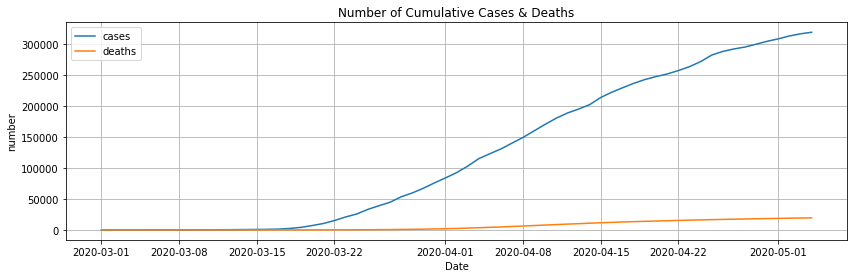

In [4]:
state = 'New York'      
s = str(state)
df = statedict[s]
        
dates = df['date']
cases = df['cases']
deaths = df['deaths']

plt.figure(figsize=(14,4))
plt.plot(dates, cases, label='cases')
plt.plot(dates, deaths, label='deaths')
plt.xlabel('Date')
plt.ylabel('number')
plt.title('Number of Cumulative Cases & Deaths')
plt.grid(True)
plt.legend()

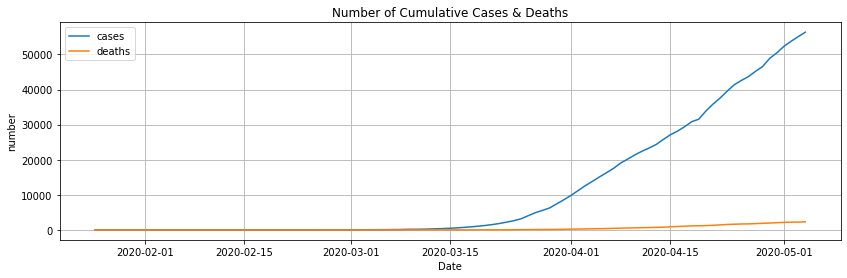

In [5]:
state = 'California'      
s = str(state)
df = statedict[s]
        
dates = df['date']
cases = df['cases']
deaths = df['deaths']

plt.figure(figsize=(14,4))
plt.plot(dates, cases, label='cases')
plt.plot(dates, deaths, label='deaths')
plt.xlabel('Date')
plt.ylabel('number')
plt.title('Number of Cumulative Cases & Deaths')
plt.grid(True)
plt.legend()

From these charts, we can see how the data for the states have something in common, they all have an exponential or rapidly increasing rate of cases and a steady but increasing rate of date. We see that the shape for Indiana and New York are similar, but California has a more exponential pattern. 

We are able to examine the raw data to shape our machine learning model. 

#Resources:

[Analyze NY Times COVID-19 Dataset](https://towardsdatascience.com/analyze-ny-times-covid-19-dataset-86c802164210)

[NYT COVID-19 Dataset](https://github.com/nytimes/covid-19-data)

# Linear Regression Models

$\textbf{1. Linear regression on state's data to predict number of cases}$ \\
For our first model, we  used a linear regression on the us-state data with the number of cases on the first day of the Stay at Home order as the input, and Number of cases on May 1 as the target.

We first plotted the regression using the raw numbers of cases and it looked like it had a logarithmic fit, so we tried log normalizing the data and that works pretty well with a linear regression. Using only the number of cases on the first day of the stay at home order by state, and the output value being the number of cases on May 1, we were able to get a testing RMSE of 0.7. This is not a perfect model, but for being so simple, seems to be a pretty good way to predict general trends for the number of future cases, by state.

        date    state  fips     cases  deaths
0  3/13/2020  Alabama     1  1.791759       0
1  3/14/2020  Alabama     1  2.484907       0
2  3/15/2020  Alabama     1  3.135494       0
3  3/16/2020  Alabama     1  3.367296       0
4  3/17/2020  Alabama     1  3.663562       0
[3.90225505]
[[0.80311506]]
      Output  Predicted
0   7.745003   8.103437
1  10.320189  10.723031
2   9.298534   9.663153
3   9.658929   9.738354
4   7.540622   7.766993
5   7.855157   8.120435
6   8.164226   7.600737
7  10.934089   9.220006
8   6.778785   7.559542


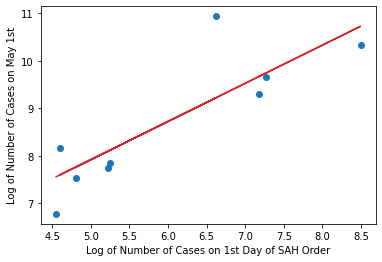

---------- Evaluation of Testing Data ----------
Mean Absolute Error Test: 0.5283665257014313
Mean Squared Error Test: 0.490756759844778
Root Mean Squared Error Test: 0.7005403342026625


In [0]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import metrics
from sklearn import preprocessing 

path = 'drive/My Drive/Final_Proj/'

file = path + 'covid-19-data-master/us-states.csv'
file2 = path + 'Statewide-Stay-at-Home-Orders.csv'
sah = pd.read_csv(file2)

df = pd.read_csv(file)

states = list(df.state.unique())
states_rem = ['Puerto Rico', 'Guam', 'Northern Mariana Islands', 'Virgin Islands', 'Arkansas',\
              'Iowa', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota',\
              'Utah', 'Wyoming', 'Hawaii']

for state in states_rem:
    states.remove(state)

## Log normalize the data
x = df['cases'].values
x_log = np.log(x)
df_case = pd.DataFrame(x_log)
df['cases'] = df_case

print(df.head(5))

################### States: #########################


def get_data_features(state):
    
    state_data = df.loc[df['state'] == state]
    
    sah_state = sah.loc[sah['State'] == state] #pull state SAH order date by matching state name
    sah_date = sah_state.iloc[0]['Effective Date'] #isolate SAH order date

    idx = np.where(state_data['date'] == sah_date) #find the index where SAH order starts in state data
    df_slice = state_data.iloc[idx[0][0] : len(state_data)] #slice state data so it starts with SAH order date

##    x = np.arange(0, len(df_slice)) #list dates on x-axis as int starting with 0
    slice_list = list(df_slice['cases']) # turn slice into a list
   
    x = slice_list[0] # num on first day of SAH
    #x = len(state_data) - len(df_slice) # num of days between first case and SAH order
    y = slice_list[-1] #num cases on May1
  
    return x, y

x_vals = []
y_vals = []

for state in states:
    x, y = get_data_features(state)
    x_vals.append(x)
    y_vals.append(y)


x_np = np.array(x_vals)
y_np = np.array(y_vals)

X = x_np.reshape(-1, 1)
y = y_np.reshape(-1, 1)

#separate data into training and testing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train the model
reg = LinearRegression()  
reg.fit(X_train, y_train) 

# y_intercept
print(reg.intercept_)

#slope
print(reg.coef_)

prediction = reg.predict(X_test)

compare = pd.DataFrame({'Output': y_test.flatten(), 'Predicted': prediction.flatten()})
print(compare)

plt.scatter(X_test, y_test,  color='tab:blue')
plt.plot(X_test, prediction, color='tab:red')
plt.xlabel("Log of Number of Cases on 1st Day of SAH Order")
plt.ylabel("Log of Number of Cases on May 1st")
plt.show()

print("---------- Evaluation of Testing Data ----------")
print('Mean Absolute Error Test:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error Test:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error Test:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



$\textbf{2. Linear Regression on Indiana Counties Data}$ \\

For our next models, we wanted to use county data since this had more data points for each state. Specifically, we wanted to take a closer look at the data from Indiana.  \\

**Using Regression Model of Rest of Indiana Counties to Make Predictions about Monroe County**

For this model, we perform another linear regression using the number of cases two weeks prior to May 1 (April 17) to make predictions about number of cases on May 1. Using all counties except for Monroe County, we split the data into training and testing sets with 5-fold cross validation, and kept Monroe County as a separate test data to get predictons. We used 5-fold cross validation with similar results each time, getting an average RMSE value of 0.53.
We decided to use a linear regression after plotting different features of the data againts itself and noticing the fit of the line resembled a logarithmic slope. We used logarithmic transofrmation for the number of cases column in the data in order to normalize it. When using this normalized data with our regression model, we were able to get a pretty good linear fit that could somewhat accurately predict. 

After training this model, we used a couple of data points as predictors to see how well it peformed. First, we used the number of cases on the same date that the rest of the data was trained on (April 17) as input for Monroe County, to compare the predicted value with the known target for the number of cases on May 1. The target value for this data point was 4.84 (which translates to 126 cases on a non-logarithmic scale), and the predicted output was 5.24 (about 188 cases on a non-logarithmic scale). This produces a standard deviation of about 31 cases, which is not very accurate but is able to give a genral prediction of the trends. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log



TRAINING/TESTING FOR SPLIT 1


[0.92164361]
[[0.91583161]]
     Target  Predicted
0  1.945910   2.703770
1  5.241747   5.516627
2  2.995732   3.401762
3  5.298317   5.603364
4  3.332205   3.709913
5  1.945910   2.395618
6  4.859812   4.990364
7  5.056246   4.979526
8  6.423247   6.392647
9  5.411646   5.407240


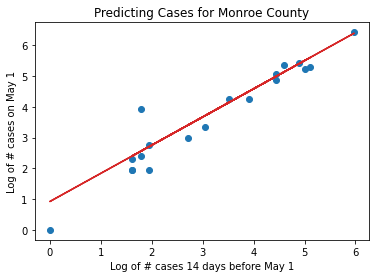


---------- Evaluate Regression Model Testing ----------
Mean Absolute Error Test: 0.3402703535771156
Mean Squared Error Test: 0.22989152175224534
Root Mean Squared Error Test: 0.4794700426014594

TRAINING/TESTING FOR SPLIT 2


[0.88923483]
[[0.92258783]]
     Target  Predicted
0  6.376727   6.129693
1  2.772589   3.323997
2  3.806662   3.447191
3  2.995732   3.255626
4  5.204007   5.428349
5  4.927254   4.586352
6  6.552508   6.494275
7  3.496508   3.698074
8  2.995732   3.503123
9  4.595120   4.896777


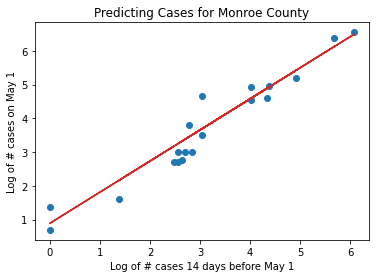


---------- Evaluate Regression Model Testing ----------
Mean Absolute Error Test: 0.35608734816845566
Mean Squared Error Test: 0.17628433051785497
Root Mean Squared Error Test: 0.41986227565459483

TRAINING/TESTING FOR SPLIT 3


[0.82136268]
[[0.9333947]]
     Target  Predicted
0  5.564520   5.371846
1  3.178054   2.493781
2  2.833213   3.140761
3  5.204007   5.041976
4  2.484907   2.323603
5  4.499810   4.310084
6  3.688879   3.964379
7  2.772589   2.762302
8  3.583519   3.706525
9  6.059123   6.214193


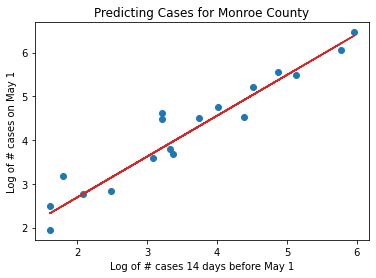


---------- Evaluate Regression Model Testing ----------
Mean Absolute Error Test: 0.2773356700858603
Mean Squared Error Test: 0.12298964277785412
Root Mean Squared Error Test: 0.35069879209637167

TRAINING/TESTING FOR SPLIT 4


[0.88810397]
[[0.91563769]]
     Target  Predicted
0  2.079442   2.157447
1  7.101676   4.506012
2  3.850148   3.971327
3  3.135494   3.304524
4  4.574711   4.998069
5  6.677083   6.687094
6  5.170484   4.751644
7  3.367296   3.534637
8  3.218876   3.367697
9  8.657651   8.392060


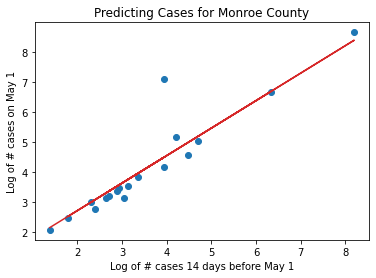


---------- Evaluate Regression Model Testing ----------
Mean Absolute Error Test: 0.33865069479654386
Mean Squared Error Test: 0.43552927641980893
Root Mean Squared Error Test: 0.659946419355245

TRAINING/TESTING FOR SPLIT 5


[0.69871959]
[[0.96517091]]
     Target  Predicted
0  2.079442   2.428074
1  5.755742   5.597130
2  4.762174   4.727717
3  5.680173   5.521884
4  3.401197   2.252102
5  5.424950   5.433148
6  2.197225   2.428074
7  4.356709   4.697553
8  7.564757   7.453478
9  3.401197   3.682104


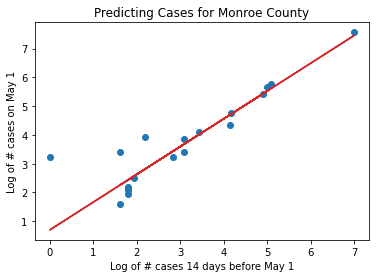


---------- Evaluate Regression Model Testing ----------
Mean Absolute Error Test: 0.4518982173681399
Mean Squared Error Test: 0.5598656033022205
Root Mean Squared Error Test: 0.748241674395526

---------- Making Predictions with Model ----------
Given number of cases on April 17, target (known) vs. Predicted cases on May 1
     Target  Predicted
0  4.836282   5.243083


Given number of cases on May 1, predicting number of cases there will be on May 15
  Target  Predicted
0    ---   5.338573


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit
import pandas as pd
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

path = 'drive/My Drive/Final_Proj/'
file = path + 'us-counties.csv'
file2 = path + 'Statewide-Stay-at-Home-Orders.csv'
sah = pd.read_csv(file2)
df = pd.read_csv(file)

## Log normalize the data
x = df['cases'].values
x_log = np.log(x)
df_case = pd.DataFrame(x_log)
df['cases'] = df_case

def get_data_features(county, state, state_data):
    county_data = state_data.loc[state_data['county'] == county] #isolate dataframe for just that county

    cases = list(county_data['cases'])
    if len(cases) >= 14:
      x1 = cases[-14] #num cases two weeks ago
      y = cases[-1] #num cases on May 1
    else:
      x1 = 0
      y = 0
    return x1, y


X_data = []
y_data = []

# Leave Monroe County out of data for making preditions
X_mon = []
y_mon = []

state = 'Indiana'
state_data = df[df.state == state]
counties  = list(state_data.county.unique())

for county in counties:

    x1, y = get_data_features(county, state, state_data)

    if county == 'Monroe':
      X_mon.append(x1)
      y_mon.append(y)
    else:
      X_data.append(x1)
      y_data.append(y)


## 5-fold CV

def get_split(X, y, split_val):
  X_train = []
  y_train = []
  X_test = []
  y_test = []

  for i in range(len(X)):
    if i%5 == split_val:
      X_test.append(X[i])
      y_test.append(y[i])
    else:
      X_train.append(X[i])
      y_train.append(y[i])
    

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  X_train = X_train.reshape(-1, 1)
  y_train = y_train.reshape(-1, 1)
  X_test = X_test.reshape(-1, 1)
  y_test = y_test.reshape(-1, 1)

  return X_train, X_test, y_train, y_test


def get_linear_reg(X_train, X_test, y_train, y_test): 

  # train the model
  reg = LinearRegression()  
  reg.fit(X_train, y_train) 

  # y_intercept
  print(reg.intercept_)

  #slope
  print(reg.coef_)

  prediction = reg.predict(X_test)

  compare = pd.DataFrame({'Target': y_test.flatten(), 'Predicted': prediction.flatten()})
  print(compare.head(10))

  plt.scatter(X_test, y_test,  color='tab:blue')
  plt.plot(X_test, prediction, color='tab:red')
  plt.xlabel("Log of # cases 14 days before May 1")
  plt.ylabel("Log of # cases on May 1")
  plt.title("Predicting Cases for Monroe County")
  plt.show()

  print("\n---------- Evaluate Regression Model Testing ----------")
  print('Mean Absolute Error Test:', metrics.mean_absolute_error(y_test, prediction))  
  print('Mean Squared Error Test:', metrics.mean_squared_error(y_test, prediction))  
  print('Root Mean Squared Error Test:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
  
  return 

for i in range(5):
  print("\nTRAINING/TESTING FOR SPLIT", i+1)
  print("\n")

  X_train1, X_test1, y_train1, y_test1 = get_split(X_data, y_data, i)
  get_linear_reg(X_train1, X_test1, y_train1, y_test1)


print("\n---------- Making Predictions with Model ----------")

# Make predictions about Monroe county
x_predict2 = np.array(X_mon)
y_predict2 = np.array(y_mon)

x_predict2 = x_predict2.reshape(-1, 1)
y_predict2 = y_predict2.reshape(-1, 1)

## Try to make prediction about values 2 weeks from now (May 15)

x_predict3 = np.array(4.83) ## log of num cases on May 1 as input
x_predict3 = x_predict3.reshape(-1, 1)

prediction2 = reg.predict(x_predict2)

compare2 = pd.DataFrame({'Target': y_predict2.flatten(), 'Predicted': prediction2.flatten()})
print("Given number of cases on April 17, target (known) vs. Predicted cases on May 1")
print(compare2)
print("\n")

prediction3 = reg.predict(x_predict3)

compare3 = pd.DataFrame({'Target': '---', 'Predicted': prediction3.flatten()})
print("Given number of cases on May 1, predicting number of cases there will be on May 15")
print(compare3)



# Using MLP Regression to Make Predictions About How the Stay At Home Order Affects Daily Rate of Infection

In the previous model, we used a linear regression to determine if the number of cases on a specific date could be used to predict the number of cases on a later date. While this was able to predict a general trend, we wanted to look more closely at the rate of change in cases prior to the stay at home order and after the stay at home order to see if the number of cases on a later date is dependent on either these values. By looking at these values and the ability of the model to predict, this may be able to give preliminary data about whether the stay at home order is effective in slowing the number of cases yet. Since we are only looking at the about a month after many of these stay at home orders were put into effect, it may be too early to observe much of a trend. \\

Since we wanted to use more features than just one, we decided to use the MLP as a linear regression this time. This model incorporates a 3 layer densely connected network, with an input layer of 2 nodes, a hidden layer of 6 nodes, and an output layer of one node. The hidden layer uses the ReLU activation function, and the output layer uses a linear activation function to be able to predict a continuous value. The model aslo uses stochastic gradient descent as an optimizer, and MSE as the loss function, since we are running a linear regression. \\

This model is trained separately on two different inputs. The first input is the number of cases on the day the stay at home order goes into effect and the average daily infection rate for the 10 days prior to the stay at home order going into effect. The second input is also the number of cases on the first day of the stay at home order, and the average daily infection rate for the 14-24 days after the stay at home order is put in place. Both models use the number of cases on May 1 as the target output. \\

The result of the first model had a training MSE of 1.36 and a testing MSE of 1.59. The result of the second model had a training MSE of 0.79 and a testing MSE of 1.46.
  

In [0]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import metrics

path = 'drive/My Drive/Final_Proj/'

file = path + 'covid-19-data-master/us-counties.csv'
file2 = path + 'Statewide-Stay-at-Home-Orders.csv'
sah = pd.read_csv(file2)

df = pd.read_csv(file)


## Log normalize the data
x = df['cases'].values
x_log = np.log(x)
df_case = pd.DataFrame(x_log)
df['cases'] = df_case


states = list(df.state.unique())
states_rem = ['Puerto Rico', 'Guam', 'Northern Mariana Islands', 'Virgin Islands', 'Arkansas',\
              'Iowa', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota',\
              'Utah', 'Wyoming', 'Hawaii']

for state in states_rem:
    states.remove(state)


################### States: #########################


def get_data_features(county, state, state_data, val):

    county_data = state_data.loc[state_data['county'] == county] #isolate dataframe for just that county

    
    sah_state = sah.loc[sah['State'] == state] #pull state SAH order date by matching state name
    sah_date = sah_state.iloc[0]['Effective Date'] #isolate SAH order date

    cases = list(county_data['cases'])
    idx = np.where(state_data['date'] == sah_date) #find the index where SAH order starts in state data
    df_slice = county_data.iloc[idx[0][0] : len(county_data)] #slice state data so it starts with SAH order date
    
    slice_list = list(df_slice['cases']) # y-axis is num of cases
    dif = len(cases) -  len(slice_list) #num days between first cases and first day of SAH

    if len(slice_list) > 34 and len(cases) - dif >= 10 :
      x1 = cases[dif - 10] # num cases 10 days before SAH
      x2 = cases[dif] # num cases on SAH
      x3 = cases[dif + 14]  #num cases 2 weeks after SAH
      x4 = cases[dif + 24] # num cases 1 mo after SAH

      r1 = np.sqrt((x2 - x1)**2/ 10)  #average daily rate over 10 days beofre SAH
      r2 = np.sqrt((x3 - x2)**2 / 14)   #average daily rate over 2 weeks after SAH
      r3 = np.sqrt((x4 - x2)**2 / 24)   #average daily rate of cahnge between 14-24 days after SAH

      if val == 1:
        x1 = r1
      elif val == 2:
        x1 = r3

      x2 = cases[dif] # cases on day of SAH
      y = cases[-1] #num cases on May 1
      #y = r3 
    
    else:
      x = 0
      r2 = 0
      r3 = 0
      x1 = 0
      x2 = 0
      y = 0
       
    return  x1, x2, y

 
x_vals = []
y_vals = []

bad=[]

#state = "Indiana"
for state in states:
  state_data = df[df.state == state]
  counties  = list(state_data.county.unique())

  for county in counties:
      x1, x2, y = get_data_features(county, state, state_data, 1)
      if y == 0:
        bad.append(x)

      else:
        x_vals.append([x1, x2])
        y_vals.append(np.array(y))

  x_np = np.array(x_vals)
  y_np = np.array(y_vals)


x_vals2 = []
y_vals2 = []

bad=[]

#state = "Indiana"
for state in states:
  state_data = df[df.state == state]
  counties  = list(state_data.county.unique())

  for county in counties:
      x1, x2, y = get_data_features(county, state, state_data, 2)
      if y == 0:
        bad.append(x)

      else:
        x_vals2.append([x1, x2])
        y_vals2.append(np.array(y))

  x_np2 = np.array(x_vals2)
  y_np2 = np.array(y_vals2)

#separate data into training and testing values
X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_np2, y_np2, test_size=0.2, random_state=0)

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten

def run_model(X_train, X_test, y_train, y_test):
  model = Sequential()
  model.add(Dense(6, input_shape=(2,), activation= 'relu'))
  model.add(Dense(1, activation='linear'))   

  ## Compile the model
  model.compile(optimizer='SGD', loss='mean_squared_error')

  ## Fit the model
  fit = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)
  
  # Evaluate the Model
  train_mse = model.evaluate(X_train, y_train, verbose=0)
  test_mse = model.evaluate(X_test, y_test, verbose=0)

  print("\nTraining Mean Squared Error:", train_mse)
  #print("Training Accuracy:", train_accuracy)
  #print("\n")
  print("Testing Mean Squared Error:", test_mse)
  #print("Testing Accuracy:", test_accuracy)

print("\nEvaluation of Model 1:")
print("Model trained on number of cases on first day of SAH Order and \n rate of change for each day 10 days prior to SAH")
run_model(X_train, X_test, y_train, y_test)

print("\nEvaluation of Model 2:")
print("Model trained on number of cases on first day of SAH Order and \n rate of change for each day 14-24 days after SAH")
run_model(X_train2, X_test2, y_train2, y_test2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log



Evaluation of Model 1:
Model trained on number of cases on first day of SAH Order and 
 rate of change for each day 10 days prior to SAH

Training Mean Squared Error: 1.366345007122193
Testing Mean Squared Error: 1.5962573800768172

Evaluation of Model 2:
Model trained on number of cases on first day of SAH Order and 
 rate of change for each day 14-24 days after SAH

Training Mean Squared Error: 0.7936570609724799
Testing Mean Squared Error: 1.4612476515168904


**Making Predictions about the amount of time between first COVID-19 case in a county and stay at home order going into effect**

For one last model, we implemented a similar neural network as in the previous section except that the number of nodes in the input and output layer are both 3, and the new model is performing a categorical classification so we used the softmax activation function on the output. \\

The model was trained on inputs with 3 features: the rate of cases 10 days prior to the the stay at home order going into effect, the rate of cases 14-24 days after the stay at home order going into effect, and the number of cases on May 1. The output is three categories, which represent the number of days between a county's first confirmed case of COVID-19 and th day the stay at home order went into effect. Category 1 is the order went into effect within 0-6 days after the first case, category 2 is the order went into effect 7-13 days after the first case, and category 3 is 14 or more days after the first confirmed case. The output is a vector of length 3, one-hot encoded to contain a single 1 in the index of the category the output value represents. \\

The intent of this model was to determine if the rate of cases could predict how early a stay at home order was put into effect by the state. If this model could reflect this, it may indicate that the rate of cases are dependent on the timing of the social distancing order. \\

After five-fold cross validation, the average training and testing accuracies for our model were: \\

**Average training accuracy:** 49.0% \\
**Average testing:** 47.2% 

These results are not very good, but are better than random guessing. If the timing of the SAH order is able to be categorized by the rate of daily cases and the number of cases on a later date after the stay at home order is in place, it may be plausible that the timing of the stay at home order correlates with how many cases there are at a later time. This would need to be explored further with different models and different features, and as more data becomes available over time to have more meaningful results. 

In [0]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import metrics

path = 'drive/My Drive/Final_Proj/'

file = path + 'covid-19-data-master/us-counties.csv'
file2 = path + 'Statewide-Stay-at-Home-Orders.csv'
sah = pd.read_csv(file2)

df = pd.read_csv(file)


## Log normalize the data
x = df['cases'].values
x_log = np.log(x)
df_case = pd.DataFrame(x_log)
df['cases'] = df_case


states = list(df.state.unique())
states_rem = ['Puerto Rico', 'Guam', 'Northern Mariana Islands', 'Virgin Islands', 'Arkansas',\
              'Iowa', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota',\
              'Utah', 'Wyoming', 'Hawaii']

for state in states_rem:
    states.remove(state)


################### States: #########################


def get_data_features(county, state, state_data, val):

    county_data = state_data.loc[state_data['county'] == county] #isolate dataframe for just that county

    
    sah_state = sah.loc[sah['State'] == state] #pull state SAH order date by matching state name
    sah_date = sah_state.iloc[0]['Effective Date'] #isolate SAH order date

    cases = list(county_data['cases'])
    idx = np.where(state_data['date'] == sah_date) #find the index where SAH order starts in state data
    df_slice = county_data.iloc[idx[0][0] : len(county_data)] #slice state data so it starts with SAH order date
    
    slice_list = list(df_slice['cases']) # y-axis is num of cases
    dif = len(cases) -  len(slice_list) #num days between first cases and first day of SAH

    if len(slice_list) > 34 and dif >= 10:
      x1 = cases[dif - 10]  # num cases 10 days before SAH
      x2 = cases[dif]       # num cases on SAH
      x3 = cases[dif + 14]  #num cases 2 weeks after SAH
      x4 = cases[dif + 24] # num cases 1 mo after SAH

      r1 = np.sqrt((x2 - x1)**2 / 10)   #average  daily rate over 10 days before SAH
      r2 = np.sqrt((x3 - x2)**2 / 14)   #average daily rate over 2 weeks after SAH
      r3 = np.sqrt((x4 - x3)**2 / 10)   #average daily rate of cahnge between 14-24 days after SAH

      if val == 1:
        x1 = x1 # num cases 10 days before of SAH
        x2 = x3 # num cases 2 weeks after SAH
        x3 = slice_list[-1] 
      elif val ==2:
        x1 = r1  #rate of change 10 - 0 days before SAH
        x2 = r3 # rate of change 14-24 days after SAH
        x3 = slice_list[-1] # number of cases on May 1

      #  categorize:
      # SAH order 0-6 days after first case = 1
      #SAH order 7-13 days after first case = 2
      # SAH order 14 + days after first case = 3
      if dif < 7:
        cat = 1
        y = [1, 0, 0]
      elif dif >= 14:
        cat = 3
        y = [0, 0, 1]
      else:
        cat = 2
        y = [0, 1, 0]

    else:
     
      r2 = 0
      r3 = 0
      x1 = 0
      x2 = 0
      x3 = 0
      y = 0
      
      
    return  x1, x2, x3, y

 

x_vals = []
y_vals = []


bad=[]

#state = "Indiana"
for state in states:
  state_data = df[df.state == state]
  counties  = list(state_data.county.unique())

  for county in counties:
      x1, x2, x3, y = get_data_features(county, state, state_data, 1)
      if y == 0:
        bad.append(x1)

      else:
        x_vals.append([x1, x2, x3])
        y_vals.append(np.array(y))


x_np = np.array(x_vals)
y_np = np.array(y_vals)

x_vals2 = []
y_vals2 = []

for state in states:
  state_data = df[df.state == state]
  counties  = list(state_data.county.unique())

  for county in counties:
      x1, x2, x3, y = get_data_features(county, state, state_data, 2)
      if y == 0:
        bad.append(x1)

      else:
        x_vals2.append([x1, x2, x3])
        y_vals2.append(np.array(y))


x_np2 = np.array(x_vals2)
y_np2 = np.array(y_vals2)

'''
#separate data into training and testing values
X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_np2, y_np2, test_size=0.2, random_state=0)
'''

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten

def run_model(X_train, X_test, y_train,  y_test):
  model = Sequential()
  model.add(Dense(6, input_shape=(3,), activation= 'relu'))
  model.add(Dense(3, activation='sigmoid'))   

  ## Compile the model
  model.compile(optimizer='SGD', loss='mean_squared_error', metrics = ['categorical_accuracy'])

  ## Fit the model
  fit = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)

  # Evaluate the Model
  train_mse, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
  test_mse, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

  print("\nTraining Mean Squared Error:", train_mse)
  print("Training Accuracy:", train_accuracy)
  print("\n")
  print("Testing Mean Squared Error:", test_mse)
  print("Testing Accuracy:", test_accuracy)

  return train_accuracy, test_accuracy 

def get_split(X, y, split_val):
  X_train = []
  y_train = []
  X_test = []
  y_test = []

  for i in range(len(X)):
    if i%5 == split_val:
      X_test.append(X[i])
      y_test.append(y[i])
    else:
      X_train.append(X[i])
      y_train.append(y[i])
    

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  return X_train, X_test, y_train, y_test

print("\n ***** Evaluation of Model  *****") 
       
print("Model trained on daily rate of number of cases 10 days before SAH,\n daily rate of cases 14-24 days after SAH and number of cases on May 1")

train_acc_tot2 = []
test_acc_tot2 = []
for i in range(5):
  print("\n--SPLIT", i+1, "--")
  X_train2, X_test2, y_train2, y_test2 = get_split(x_vals2, y_vals2, i)
  train_acc, test_acc = run_model(X_train2, X_test2, y_train2, y_test2)
  train_acc_tot2.append(train_acc)
  test_acc_tot2.append(test_acc)

print("\nAVERAGE TRAINING ACCURACY:", sum(train_acc_tot2)/5)
print("AVERAGE TESTING ACCURACY:", sum(test_acc_tot2)/5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log



 ***** Evaluation of Model  *****
Model trained on daily rate of number of cases 10 days before SAH,
 daily rate of cases 14-24 days after SAH and number of cases on May 1

--SPLIT 1 --

Training Mean Squared Error: 0.23365677339690072
Training Accuracy: 0.44285714626312256


Testing Mean Squared Error: 0.23493235641055638
Testing Accuracy: 0.4166666567325592

--SPLIT 2 --

Training Mean Squared Error: 0.26379446780427973
Training Accuracy: 0.44680851697921753


Testing Mean Squared Error: 0.27066079548427036
Testing Accuracy: 0.4000000059604645

--SPLIT 3 --

Training Mean Squared Error: 0.254199170580147
Training Accuracy: 0.567375898361206


Testing Mean Squared Error: 0.2547376922198704
Testing Accuracy: 0.5428571701049805

--SPLIT 4 --

Training Mean Squared Error: 0.24398783441130997
Training Accuracy: 0.5602836608886719


Testing Mean Squared Error: 0.24609814413956232
Testing Accuracy: 0.5428571701049805

--SPLIT 5 --

Training Mean Squared Error: 0.2195395516588333
Training A

# Conclusions

In this report, we explored the New York Times COVID-19 data to determine if predictions could be made about the number of cases and rate of infection for various states and counties within the US. We used linear regression to observe if our model trained on the number of overall cases for states on a given date could be predictive of the number of cases on another date 2 weeks later. 

# Contributions:  
Serena collected data, coded the inital observations of data, and helped devise the the problem space and model architectures, and wrote up half of the report. 
Katie helped collect some of the data, put the agreed upon models into code, and wrote up half of the report. 